## Project Name - **Glass Quality Identification Project**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**


This project involves classifying 214 glass samples into one of six categories based on their chemical properties. The dataset, credited to Vina Spiehler in 1987, includes 10 attributes such as refractive index, sodium, magnesium, aluminum, silicon, potassium, calcium, barium, iron, and ID number. The aim is to predict the type of glass, ranging from building windows to tableware, which has implications in criminological investigations where glass evidence is a key factor.

The classification task is motivated by its potential use in forensic investigations, where correctly identifying the type of glass found at a crime scene is crucial. The dataset can be further divided into two main categories: window glass (classes 1-4) and non-window glass (classes 5-7).

The project seeks to build a predictive model that utilizes the provided chemical attributes to accurately classify glass samples, which can be valuable in criminal investigations and other industries requiring precise glass type identification.


We have below chemical feature for glass,

1.   **ID number** : ID Number of glass
2.   **Refractive index(RI)** : RI of glass
3.   **Sodium(Na)** : Represents the amount of Sodium in the glass id.
4.   **Magnesium(Mg)** : Represents the amount of Magnesium in the glass id.
5.   **Aluminum(Al)** : Represents the amount of Aluminum in the glass id.
6.   **Silicon(Si)** : Represents the amount of Silicon in the glass id.
7.   **Potassium(K)** : Represents the amount of Potassium in the glass id.
8.   **Calcium(Ca)** : Represents the amount of Calcium in the glass id.
9.   **Barium(Ba)** : Represents the amount of Barium in the glass id.
10.  **Iron(Fe)** : Represents the amount of Iron in the glass id.

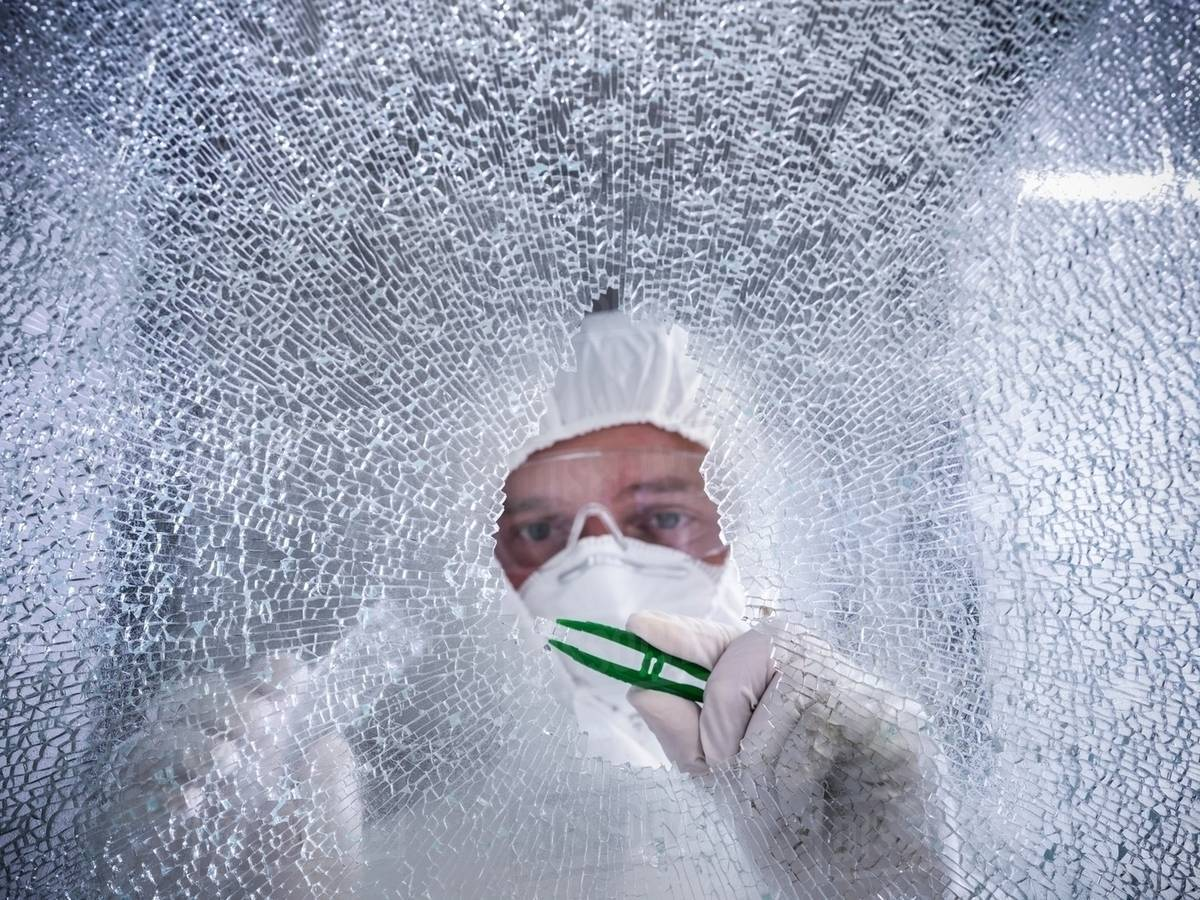

# **Problem Statement**

**The problem at hand is to develop a classification model that can accurately determine the type of glass material based on its chemical composition. With a dataset of 214 glass samples, each described by ten attributes, including refractive index and the weight percentages of various oxides like sodium, magnesium, aluminum, silicon, potassium, calcium, barium, and iron, the objective is to predict one of six glass types.**

The significance of this problem lies in its application to forensic investigations where identifying the type of glass found at a crime scene can provide crucial evidence. A robust classification model can aid law enforcement agencies in solving criminal cases. Moreover, it has relevance in industries dealing with glass manufacturing and quality control, ensuring the right materials are used for specific applications. Therefore, the project's goal is to create a predictive model that effectively distinguishes these glass types based on their chemical attributes, contributing to both forensic science and industrial sectors.


## Knowing data and variable in dataset

In [3]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
glass_data = pd.read_csv('/content/drive/MyDrive/DataSets/glass1.csv')

glass_data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


**We can observe that there were no column names, will assign column names as given in description.**

In [12]:
col_name = ['RI','Sodium_Na','Magnesium_Mg','Aluminum_Al','Silicon_Si','Potassium_K','Calcium_Ca','Barium_Ba','Iron_Fe','Type']

glass_data = pd.read_csv("/content/drive/MyDrive/DataSets/glass1.csv", names=col_name)

In [13]:
glass_data.head()

,RI,Sodium_Na,Magnesium_Mg,Aluminum_Al,Silicon_Si,Potassium_K,Calcium_Ca,Barium_Ba,Iron_Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
glass_data.columns

Index(['RI', 'Sodium_Na', 'Magnesium_Mg', 'Aluminum_Al', 'Silicon_Si',
       'Potassium_K', 'Calcium_Ca', 'Barium_Ba', 'Iron_Fe', 'Type'],
      dtype='object')

All columns name are in single words no need to rename for any.

In [15]:
# Will Check for shape of dataset

glass_data.shape

(214, 10)

**We have total 214 rows and 10 column in our detaset.**

**Dataset Information**

In [16]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RI            214 non-null    float64
 1   Sodium_Na     214 non-null    float64
 2   Magnesium_Mg  214 non-null    float64
 3   Aluminum_Al   214 non-null    float64
 4   Silicon_Si    214 non-null    float64
 5   Potassium_K   214 non-null    float64
 6   Calcium_Ca    214 non-null    float64
 7   Barium_Ba     214 non-null    float64
 8   Iron_Fe       214 non-null    float64
 9   Type          214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


From .info(), we can observe that there were varaibles with datatype of float and int only.

In [17]:
# Will check for description of dataset

glass_data.describe()

,RI,Sodium_Na,Magnesium_Mg,Aluminum_Al,Silicon_Si,Potassium_K,Calcium_Ca,Barium_Ba,Iron_Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**From .describe() we can get count, mean, minimum value, maximum values ans quirtile value for each numerical column.**

**Will Check for Null value in dataset**

In [19]:
glass_data.isnull().sum()

RI              0
Sodium_Na       0
Magnesium_Mg    0
Aluminum_Al     0
Silicon_Si      0
Potassium_K     0
Calcium_Ca      0
Barium_Ba       0
Iron_Fe         0
Type            0
dtype: int64

<Axes: >

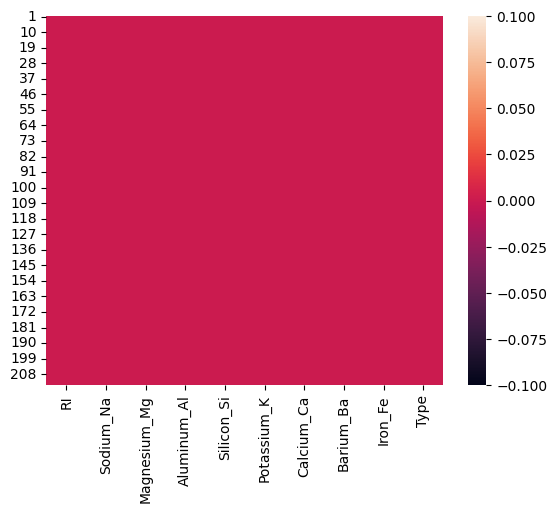

In [20]:
sns.heatmap(glass_data.isnull())

From above isnull() and heatmap we can observe that there were no any null values present in dataset.

#### Chart - 1

### **Type of glass and count**

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


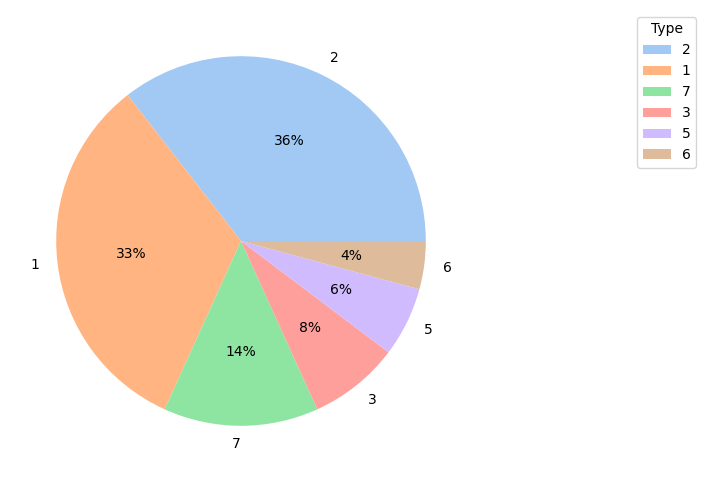

In [25]:
type_count = glass_data['Type'].value_counts()

print(type_count)

labels = type_count.index

plt.figure(figsize=(8,6))
sns.set_palette('pastel')
plt.pie(type_count,labels=type_count.index,autopct='%.0f%%')
plt.legend(labels, title="Type", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Insights from above charts:**

1. The pie chart displays the distribution of glass types in the dataset. It appears that some types are more prevalent than others.

2. By examining the chart or the output of type_count, we can identify the glass of type 2 with the highest percentage of 36%. This type is the most common in the dataset, which could have implications in forensic investigations and industrial applications.

#### Chart - 2

### **Sodium and type of glass & Distribution of Sodium**

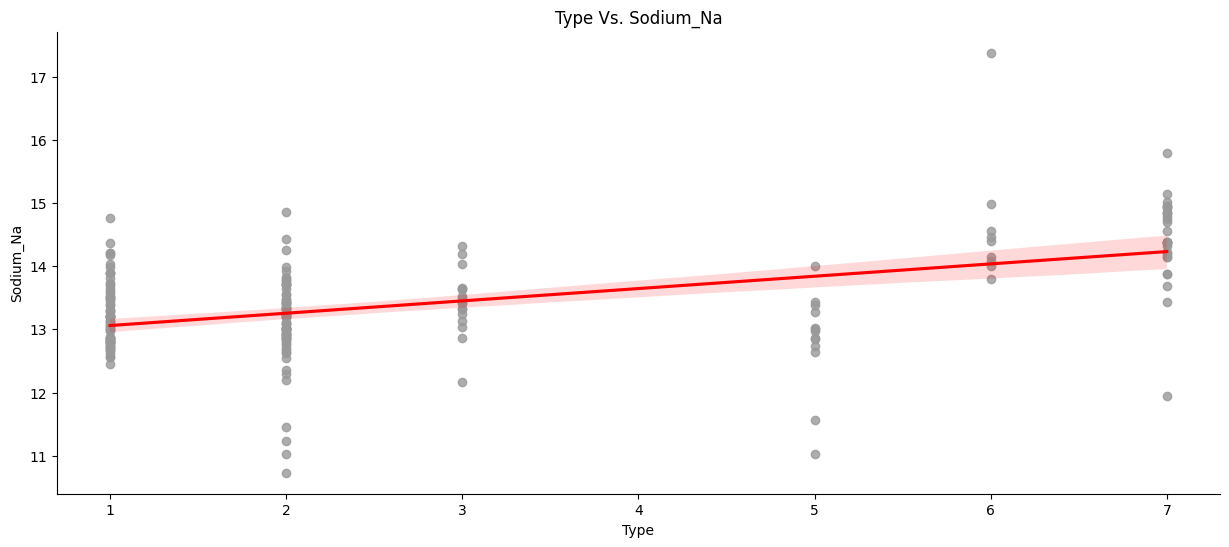

In [26]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Sodium_Na', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Sodium_Na')
plt.title('Type Vs. Sodium_Na')
plt.show()

Charges mean : 13.407850467289718


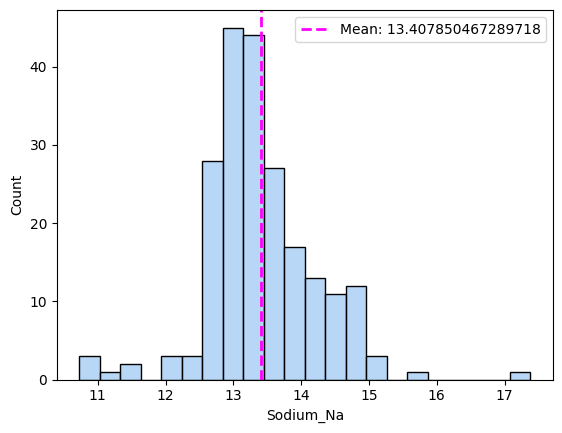

In [29]:
Sodium_Na_Mean = glass_data['Sodium_Na'].mean()

print('Charges mean :',Sodium_Na_Mean)


sns.histplot(data=glass_data, x="Sodium_Na")
plt.axvline(Sodium_Na_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Sodium_Na_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**
     
1.  The scattered data points represent individual glass samples. Each point's position on the y-axis (Sodium_Na) corresponds to the Sodium content, while its position on the x-axis (Type) indicates the type of glass.Type 7 glass have more Sodium content than other.The red regression line in the plot illustrates the trend in the data.We can observe that slope is positive, it suggests a positive correlation between the 'Type' of glass and 'Sodium_Na' content.

2.  The magenta dashed line in histogram (Mean=13.40) represents the mean sodium content, which is the central tendency of the data. It provides a measure of the typical sodium content in the dataset.

#### Chart - 3

### **Magnesium and type of glass & Distribution of Magnesium**

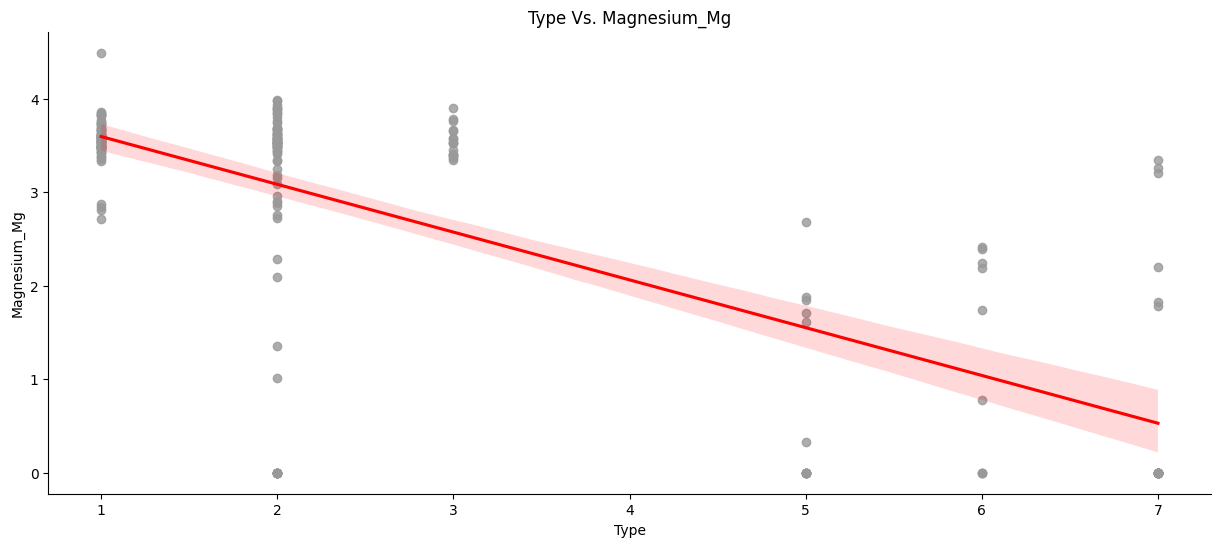

In [30]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Magnesium_Mg', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Magnesium_Mg')
plt.title('Type Vs. Magnesium_Mg')
plt.show()

Charges mean : 2.684532710280374


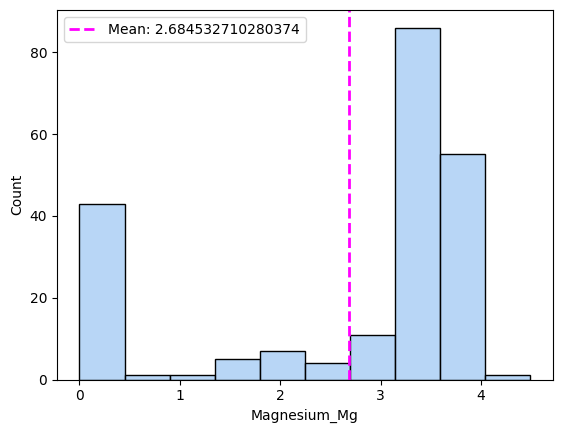

In [31]:
Magnesium_Mg_Mean = glass_data['Magnesium_Mg'].mean()

print('Charges mean :',Magnesium_Mg_Mean)


sns.histplot(data=glass_data, x="Magnesium_Mg")
plt.axvline(Magnesium_Mg_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Magnesium_Mg_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1.  The plot shows the variation in the Magnesium content for different types of glass. Each data point represents a specific type of glass (1-6), and the scatter points illustrate the spread of Magnesium content within each type.
  
2.  The red regression line represents the overall trend in Magnesium content concerning the glass types. It helps to identify any general pattern or correlation.

3.  From the plot, we can see that Type 2 and Type 3 glasses have a noticeable difference in their Magnesium content. Type 2 glass typically has higher Magnesium content compared to Type 3.Type 5 glass has a distinctively low Magnesium content compared to other types, as evident from the lower end of the scatter plot.

4.  The mean magnesium content in the glass samples is calculated and displayed. This provides a central tendency measure, giving an idea of the average magnesium content across all samples.The dashed magenta line represents the mean value, and it seen that the data is not evenly distributed around this mean. This indicates that the data may not be normally distributed

#### Chart - 4

### **Aluminum_Al and type of glass & Distribution of Aluminum_Al**

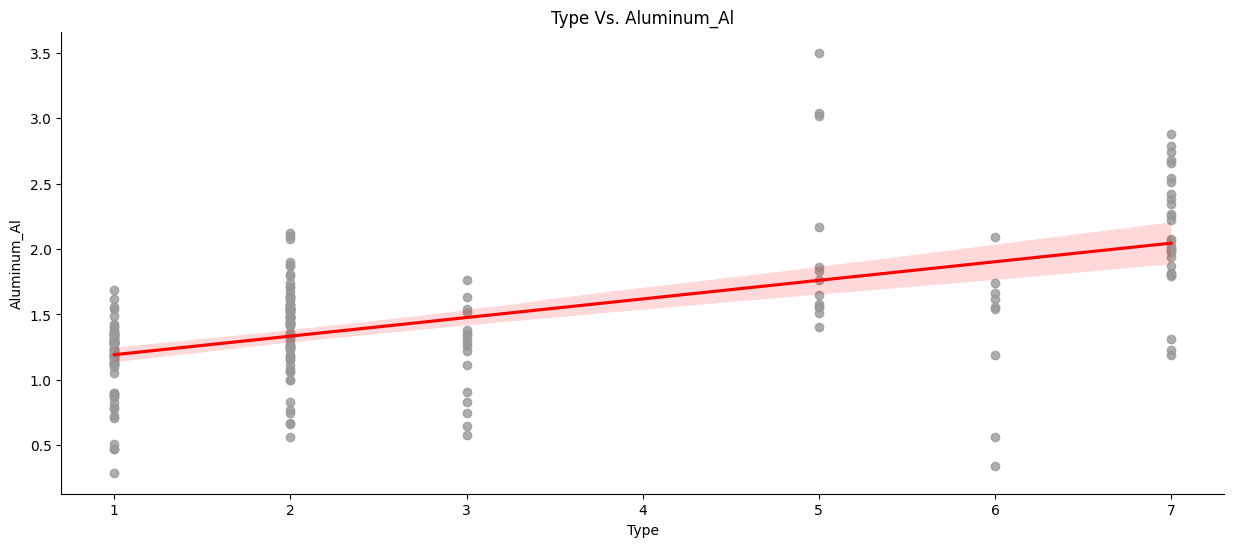

In [32]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Aluminum_Al', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Aluminum_Al')
plt.title('Type Vs. Aluminum_Al')
plt.show()

Charges mean : 1.444906542056075


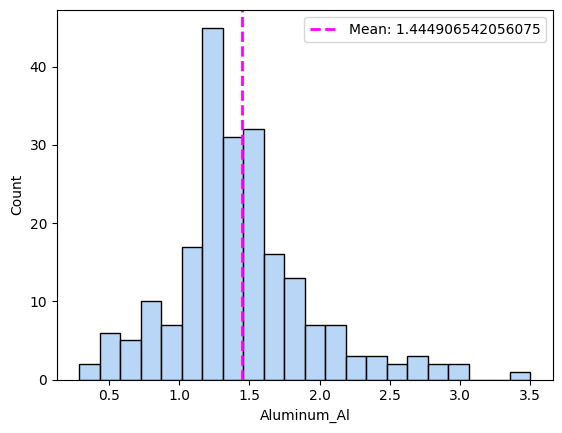

In [33]:
Aluminum_Al_Mean = glass_data['Aluminum_Al'].mean()

print('Charges mean :',Aluminum_Al_Mean)


sns.histplot(data=glass_data, x="Aluminum_Al")
plt.axvline(Aluminum_Al_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Aluminum_Al_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1. The scatter points on the graph represent individual glass samples. Each point corresponds to a specific glass type (1-7) on the x-axis and the aluminum content on the y-axis.

2. The red trend line in the plot represents the regression line, showing the general trend in aluminum content concerning the glass type.We can observe that slope is positive, it suggests a positive correlation between the 'Type' of glass and 'Aluminum_Al' content.

3. The magenta dashed line on the histogram marks the position of the mean Mean(1.44). It helps to understand how the mean relates to the overall distribution of the data.

#### Chart - 5

### **Silicon_Si and type of glass & Distribution of Silicon_Si**

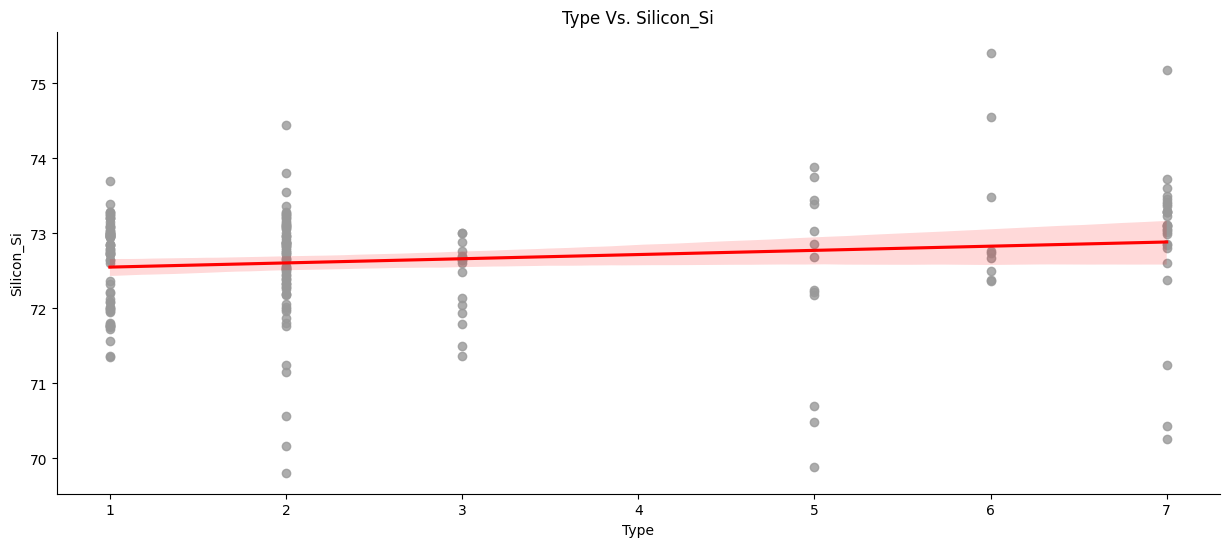

In [34]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Silicon_Si', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Silicon_Si')
plt.title('Type Vs. Silicon_Si')
plt.show()

Charges mean : 72.65093457943925


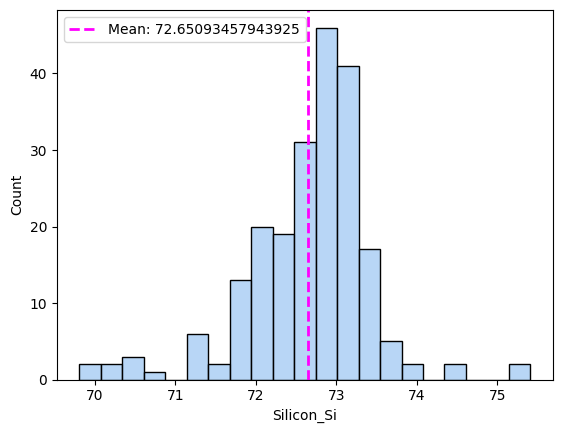

In [35]:
Silicon_Si_Mean = glass_data['Silicon_Si'].mean()

print('Charges mean :',Silicon_Si_Mean)


sns.histplot(data=glass_data, x="Silicon_Si")
plt.axvline(Silicon_Si_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Silicon_Si_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1. The regression plot shows how the 'Silicon_Si' content varies across different types of glass.

2. Type 2 and Type 3 glasses have notably higher Silicon (Si) content compared to the other types. This suggests that Silicon may be a distinguishing feature for these types of glass.

3. Type 1 glass has relatively lower Silicon content compared to Type 2 and Type 3 but is still higher compared to other types.

4. A magenta dashed line is added to the histogram plot, representing the calculated mean value (Silicon_Si_Mean). This line helps to visualize how the mean relates to the distribution of the data.

#### Chart - 6

### **Potassium_K and type of glass & Distribution of Potassium_K**

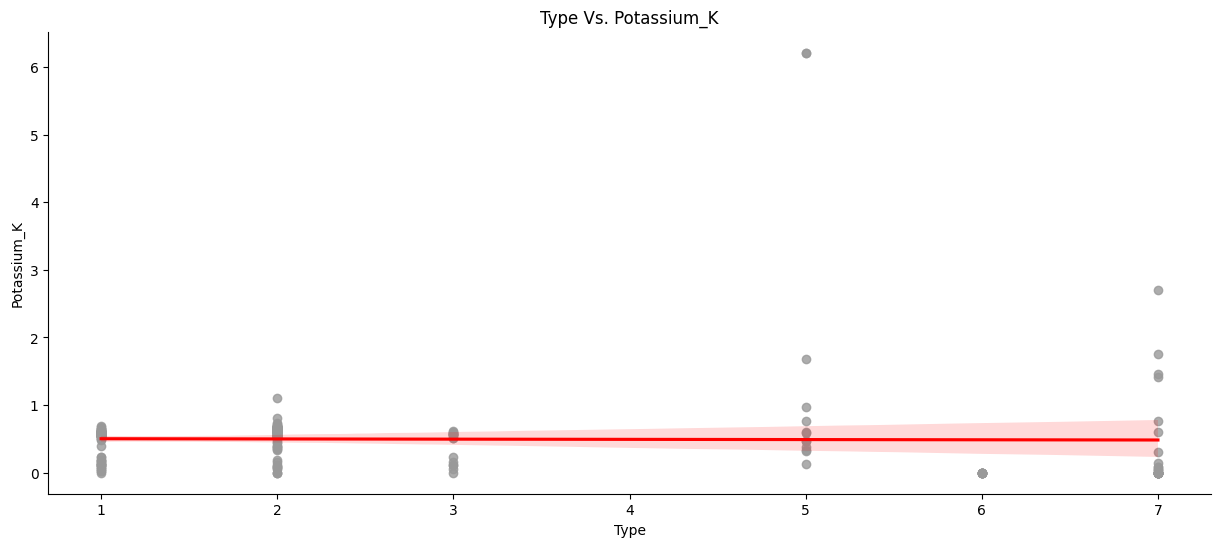

In [36]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Potassium_K', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Potassium_K')
plt.title('Type Vs. Potassium_K')
plt.show()

Charges mean : 0.4970560747663551


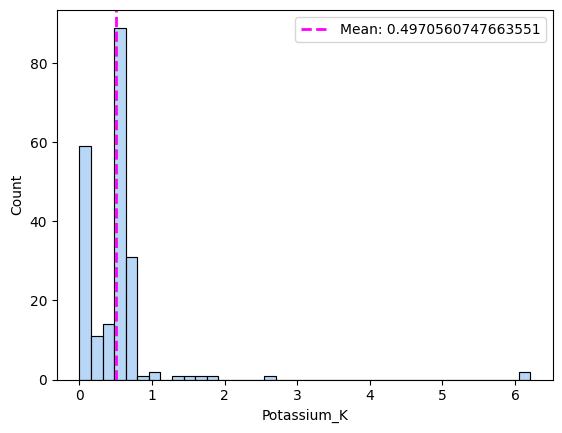

In [37]:
Potassium_K_Mean = glass_data['Potassium_K'].mean()

print('Charges mean :',Potassium_K_Mean)


sns.histplot(data=glass_data, x="Potassium_K")
plt.axvline(Potassium_K_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Potassium_K_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1. The scatter plot represents the distribution of data points for different types of glass (x-axis) against their respective Potassium_K values (y-axis).

2. The red regression line in the plot provides a general trendline, indicating the overall relationship between glass type and Potassium_K content.

3. The slope and direction of the regression line indicate there is a correlation between glass type and Potassium_K content.

4. The magenta dashed line on the histogram corresponds to the calculated mean of 'Potassium_K.' It provides a visual reference point for where the average value falls within the distribution.

#### Chart - 7

### **Calcium_Ca and type of glass & Distribution of Calcium_Ca**

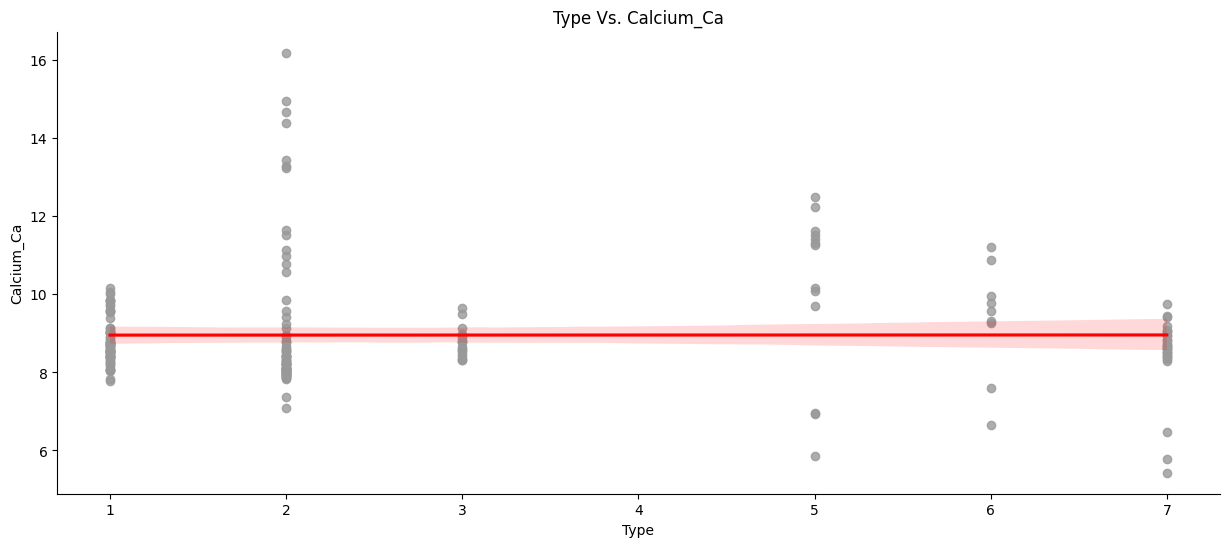

In [38]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Calcium_Ca', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Calcium_Ca')
plt.title('Type Vs. Calcium_Ca')
plt.show()

Charges mean : 8.95696261682243


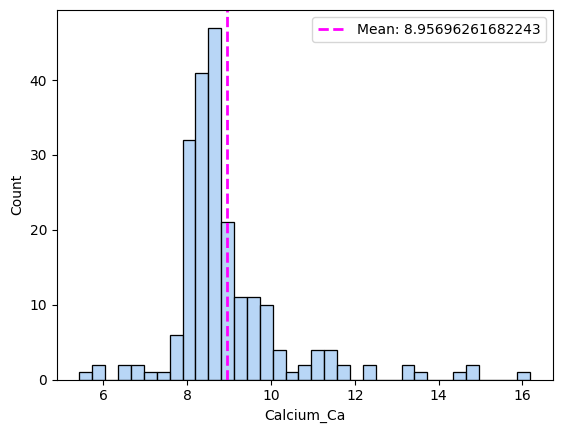

In [39]:
Calcium_Ca_Mean = glass_data['Calcium_Ca'].mean()

print('Charges mean :',Calcium_Ca_Mean)


sns.histplot(data=glass_data, x="Calcium_Ca")
plt.axvline(Calcium_Ca_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Calcium_Ca_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1. The scatter points represent individual glass samples, and their distribution along the 'Calcium_Ca' axis varies for different 'Type' categories.

2. The red regression line on the plot suggests a potential linear relationship between the 'Type' of glass and the 'Calcium_Ca' content.

3. The majority of Type 1 and Type 2 glass samples seem to have relatively lower 'Calcium_Ca' content compared to other types.Type 5 and Type 7 glass samples show a relatively higher 'Calcium_Ca' content.Type 3 and Type 6 glass samples exhibit a wide range of 'Calcium_Ca' content, suggesting a less clear-cut relationship.It's worth noting that Type 4 is not present in the dataset and is not represented in the plot.

4. A magenta dashed line is added to the histogram plot at the calculated mean value ('Calcium_Ca_Mean').

#### Chart - 8

### **Barium_Ba and type of glass & Distribution of Barium_Ba**

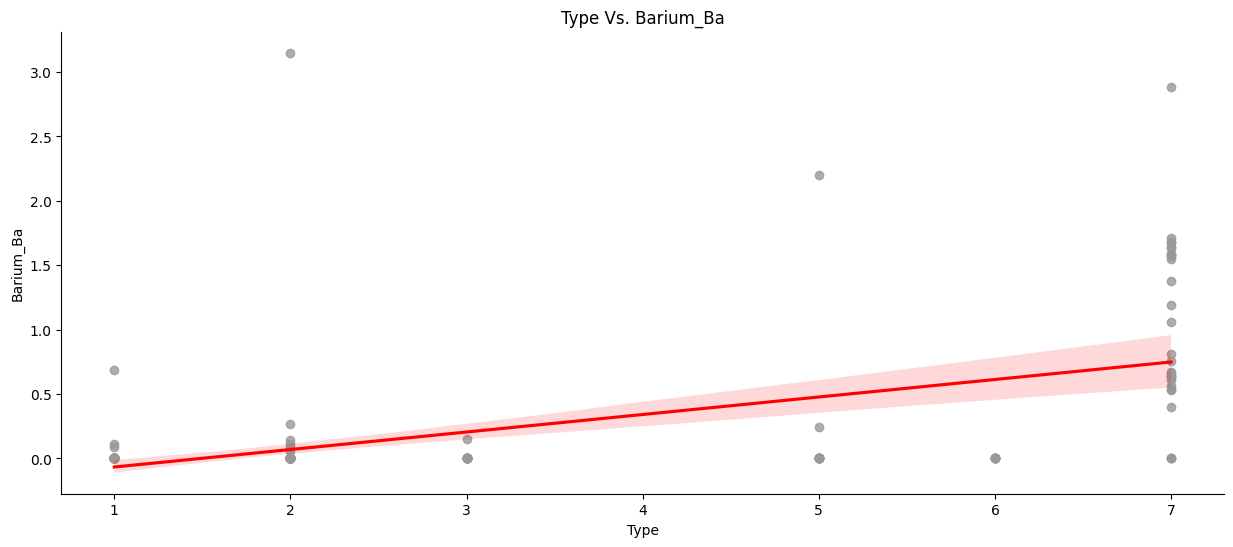

In [40]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Barium_Ba', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Barium_Ba')
plt.title('Type Vs. Barium_Ba')
plt.show()

Charges mean : 0.17504672897196263


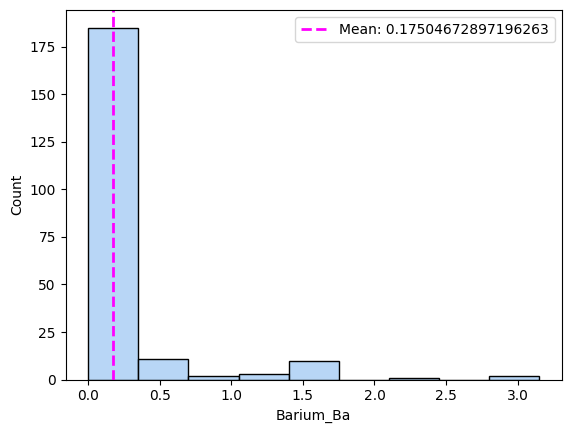

In [41]:
Barium_Ba_Mean = glass_data['Barium_Ba'].mean()

print('Charges mean :',Barium_Ba_Mean)


sns.histplot(data=glass_data, x="Barium_Ba")
plt.axvline(Barium_Ba_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Barium_Ba_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1. The plot visually represents the relationship between the "Type" of glass and the "Barium (Ba)" content.The plot shows that the "Barium (Ba)" content varies across different glass types.

2. The red regression line provides an overall trend in the data. It shows whether there is a positive correlation between "Type" and "Barium (Ba)" content.

3. The magenta dashed line on the histogram corresponds to the mean value of Barium_Ba.(Mean = 0.175) This line helps visualize how the mean relates to the distribution of the data.

#### Chart - 9

### **Iron_Fe and type of glass & Distribution of Iron_Fe**

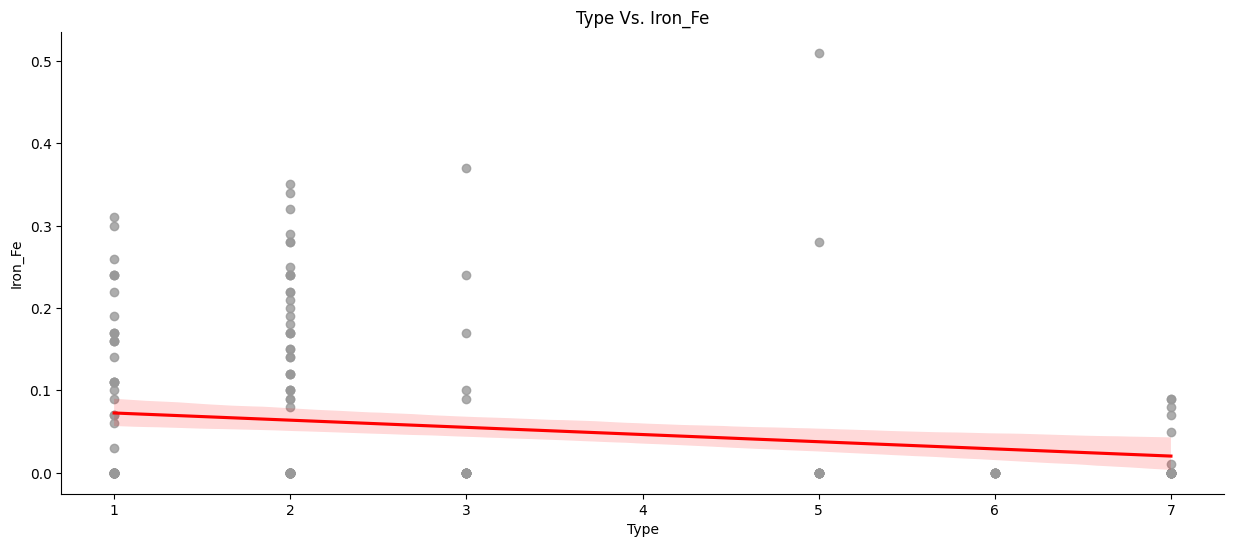

In [42]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.regplot(data=glass_data, x='Type', y='Iron_Fe', scatter=True, color=".6", line_kws=dict(color="r"))
plt.xlabel('Type')
plt.ylabel('Iron_Fe')
plt.title('Type Vs. Iron_Fe')
plt.show()

Charges mean : 0.05700934579439253


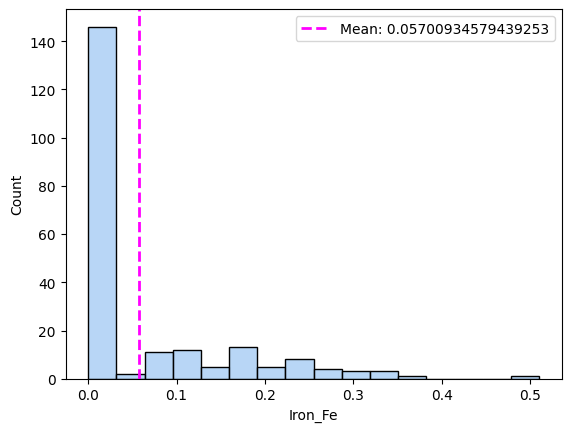

In [43]:
Iron_Fe_Mean = glass_data['Iron_Fe'].mean()

print('Charges mean :',Iron_Fe_Mean)


sns.histplot(data=glass_data, x="Iron_Fe")
plt.axvline(Iron_Fe_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {Iron_Fe_Mean}')
plt.legend()

plt.show()

**Insights from above charts:**

1. The plot shows how the Iron content varies across different glass types.The red regression line on the plot indicates the general trend in Iron content with respect to the glass types. The line slopes downward, it suggests a negative correlation between the "Type" and "Iron_Fe".

2. Type 1 and Type 2 glasses seem to have relatively lower Iron content on average compared to other types, with Type 2 having slightly higher Iron content than Type 1.

3. Type 3 glass typically has a moderate Iron content, showing a noticeable increase from Types 1 and 2. These glass types exhibit a wider range of Iron content, with Type 5 having the highest average Iron content among all the types.

4. The calculated mean value for the 'Iron_Fe' attribute is shown as a magenta dashed line in the histogram plot.(Mean = 0.05)

#### Chart -  10

### **Refractive Index Distribution**

Charges mean : 1.5183654205607477


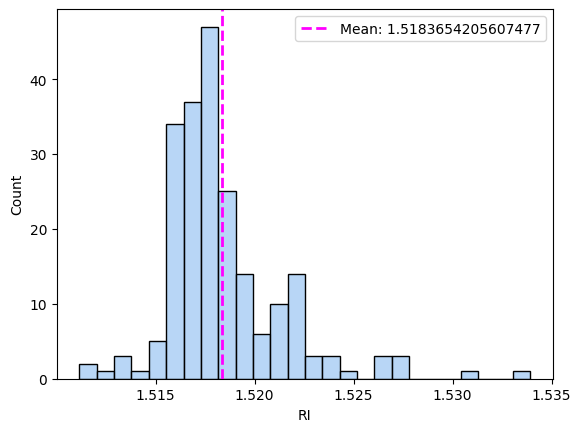

In [45]:
RI_Mean = glass_data['RI'].mean()

print('Charges mean :',RI_Mean)


sns.histplot(data=glass_data, x="RI")
plt.axvline(RI_Mean, color='magenta', linestyle='dashed', linewidth=2, label=f'Mean: {RI_Mean}')
plt.legend()

plt.show()

#### Chart - 11

### **Pair Plot**

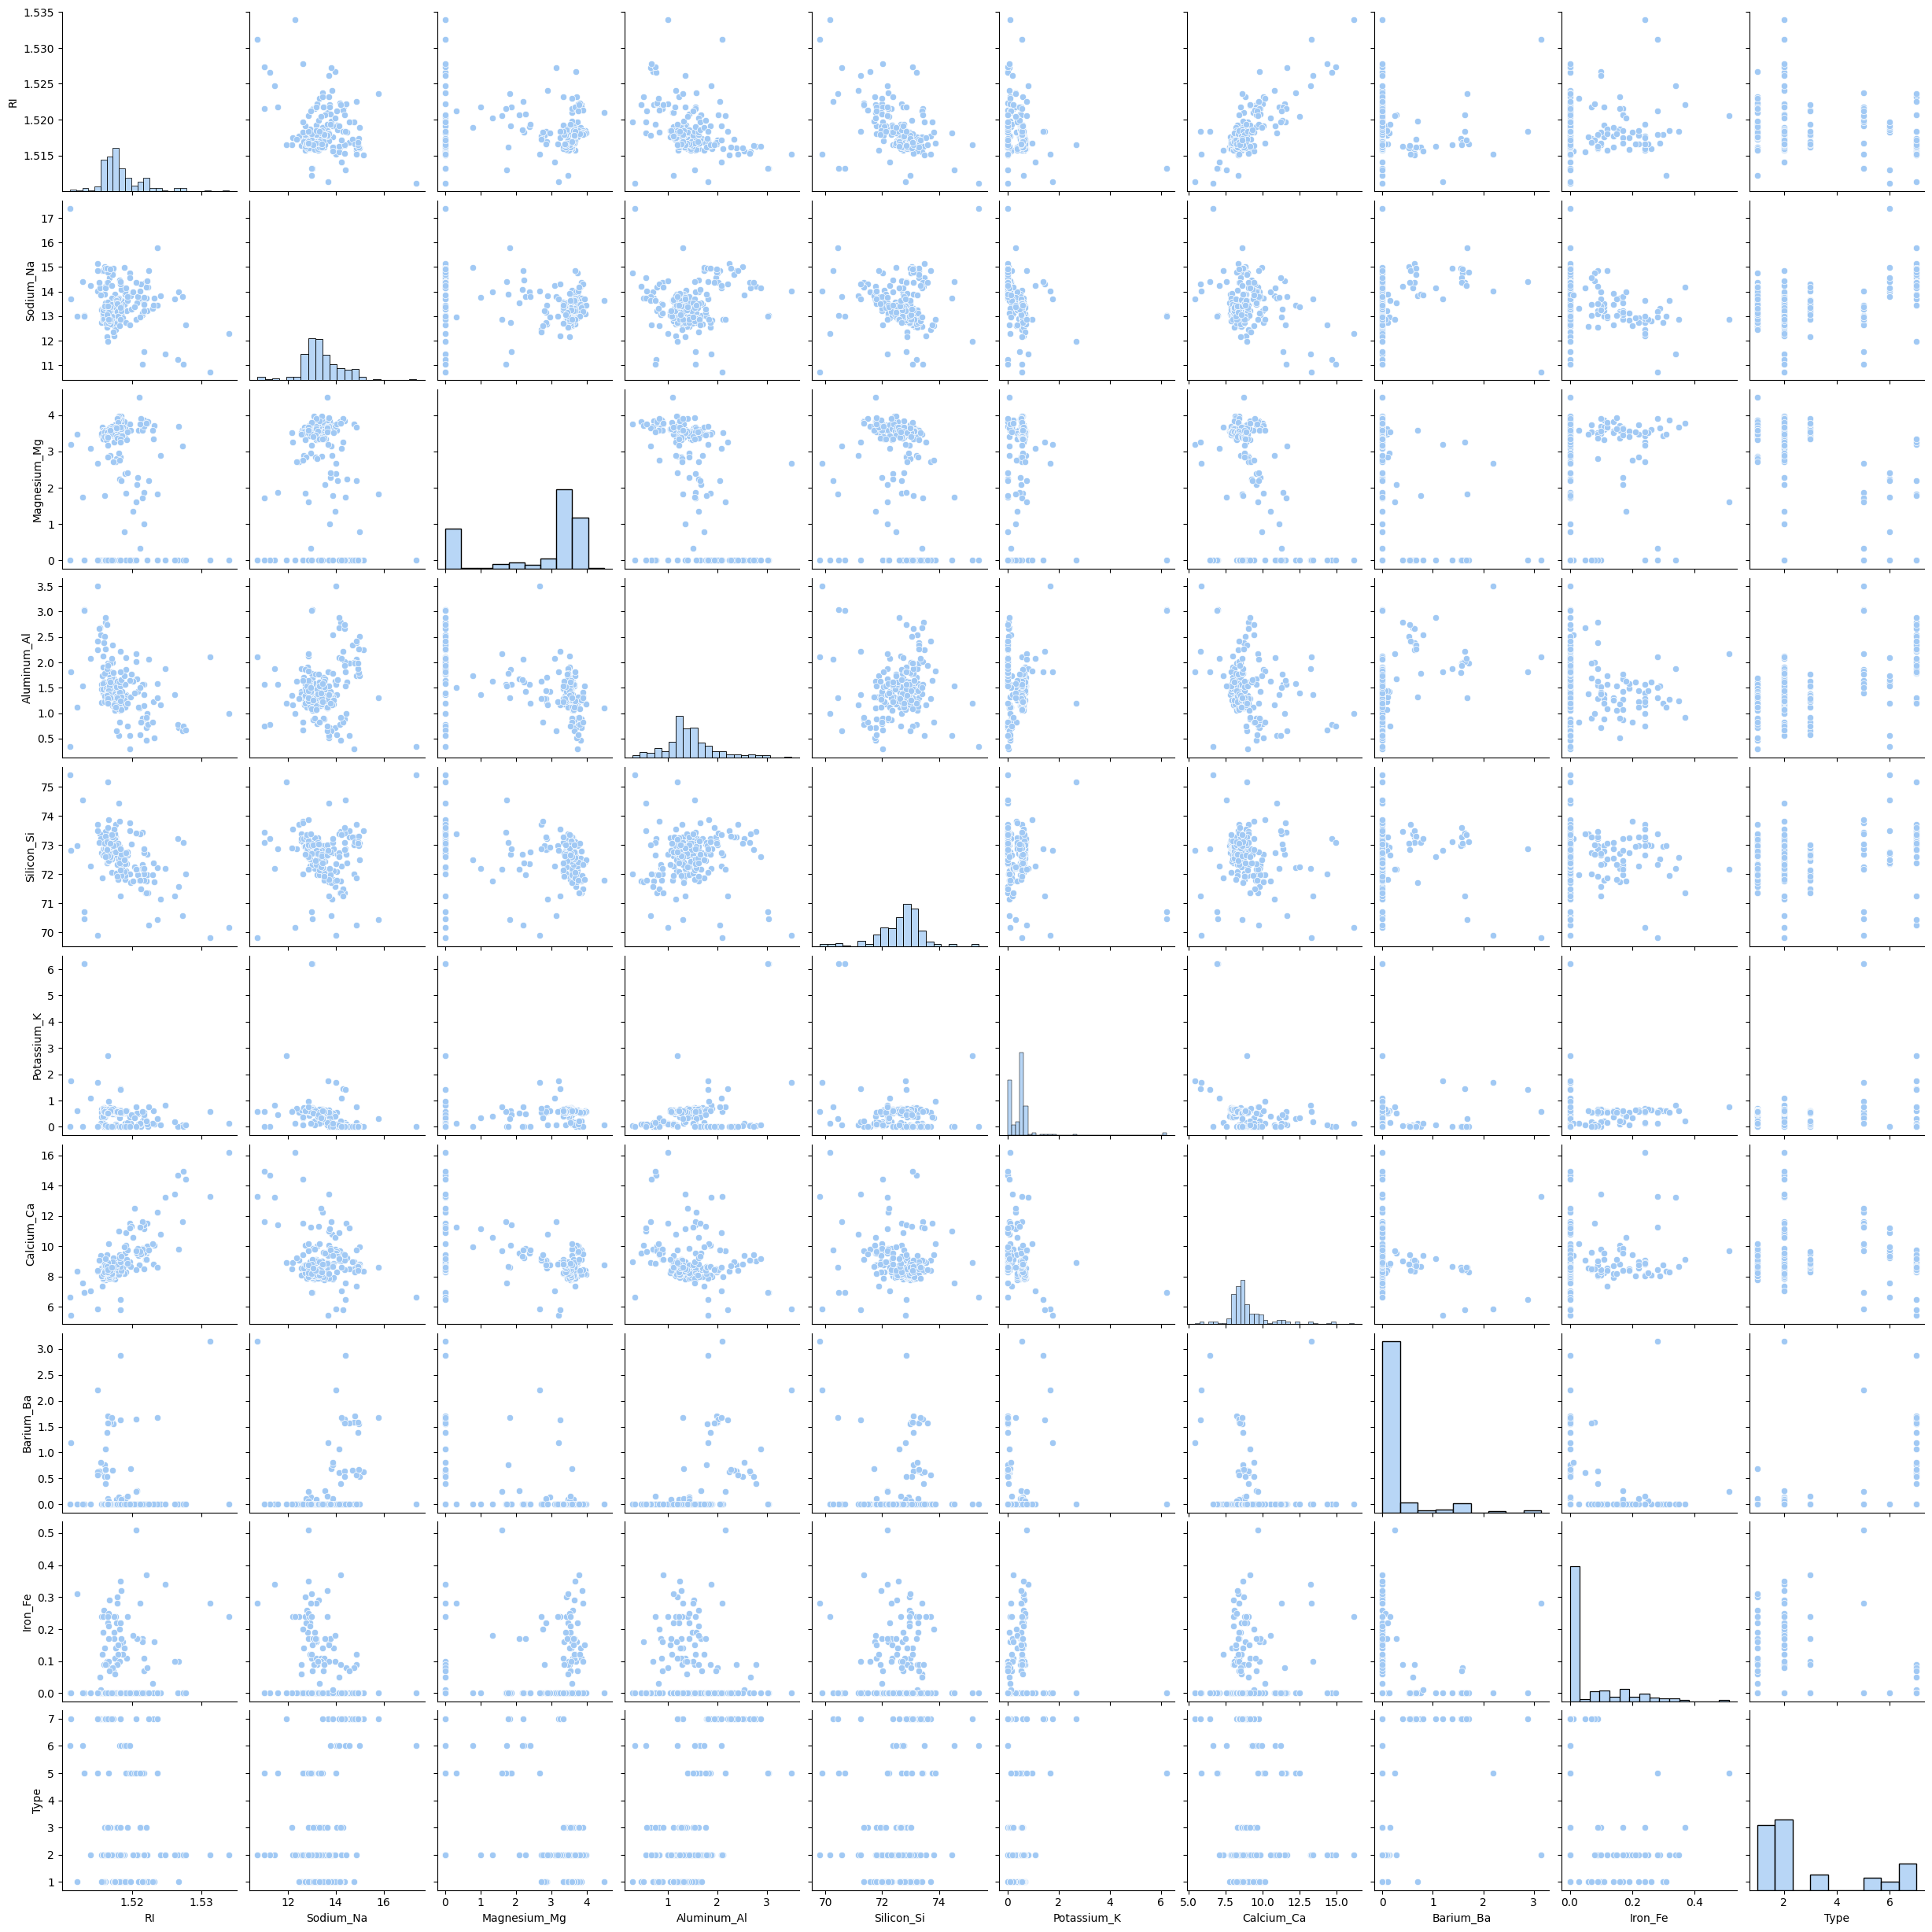

In [46]:
sns.pairplot(glass_data)

plt.show()

**Insights from above charts:**


1. Positive Correlation : 'RI' Vs.'Calcium_Ca' and 'RI' Vs.'Aluminum_Al' and 'Potassium_K' Vs. 'Iron_Fe'.

2. Seems there were no any negative correlation. Will check for heat map for identify correlation between variables.

#### Chart - 12

### **Heatmap**

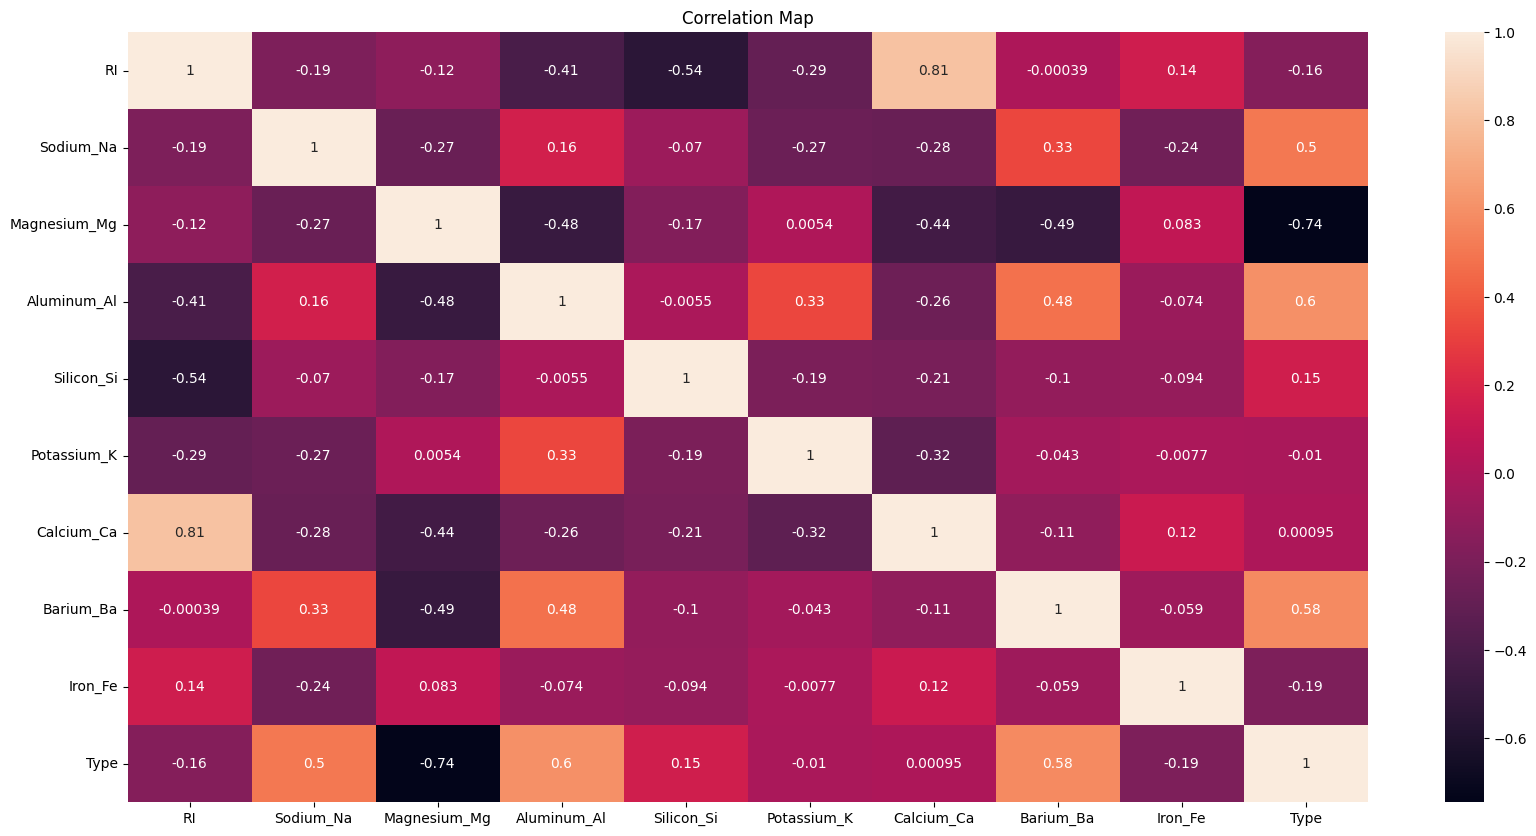

In [47]:
correlation_data = glass_data

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

**Insights from above charts:**

1. Positive Correlation : 'Calcium_Ca' Vs. 'RI' and 'Barium_Ba' Vs. 'Type'

2. Negative Correlation : 'Iron_Fe' Vs. 'Sodium_Na' and 'Magnesium_Mg' Vs. 'Type'

## **ML Model Implementation**

**Before Moving toward ML Models, have to convert y variable which is 'type' into bivariate.**

In [48]:
glass_data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

Description of type of glass,

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

Will classify type of glass into window glass (classes 1-4) and non-window glass (classes 5-7). For this will use encoding

In [49]:
# For class 1 to 4 it is classify as window glass and encode as 1
# For class 5 to 7 it is classify as non-window glass and encode as 0

encoding_nums = {"Type": {1:1, 2:1, 3:1, 4:1, 5:0, 6:0,7:0}}
encoding_nums

glass_data = glass_data.replace(encoding_nums)

In [51]:
glass_data['Type'].value_counts()

1    163
0     51
Name: Type, dtype: int64

### ML Model - 1

#### Using all Variables for ML Model-1

In [54]:
# Importing Necessary Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [55]:
# For ML Model 1 Using all variables from dataset

x = glass_data[['RI', 'Sodium_Na', 'Magnesium_Mg', 'Aluminum_Al', 'Silicon_Si',
       'Potassium_K', 'Calcium_Ca', 'Barium_Ba', 'Iron_Fe']]

y = glass_data['Type']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 1:", accuracy)
print("Confusion Matrix For ML Model 1:\n", confusion)
print("Classification Report for ML Model 1:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 1(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 1(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 1(with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 1: 0.8888888888888888
Confusion Matrix For ML Model 1:
 [[ 7  3]
 [ 3 41]]
Classification Report for ML Model 1:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.93      0.93      0.93        44

    accuracy                           0.89        54
   macro avg       0.82      0.82      0.82        54
weighted avg       0.89      0.89      0.89        54



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, 

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Accuracy For ML Model 1(with Hyperparameter Tuning): 0.9259259259259259
Confusion Matrix For ML Model 1(with Hyperparameter Tuning):
 [[ 8  2]
 [ 2 42]]
Classification Report for ML Model 1(with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.95      0.95      0.95        44

    accuracy                           0.93        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.93      0.93      0.93        54



**Insights from ML Model 1:**

*  **Before Hyperparameter Tuning:**
   1. Accuracy: 88.9%
   2. In the confusion matrix, it had 41 true positives (TP) and 7 true negatives (TN), with 3 false positives (FP) and 3 false negatives (FN).
   3. The precision, recall, and F1-scores for both classes (0 and 1) were reasonably good but can be improve.

*  **After Hyperparameter Tuning:**
   1. Accuracy: 92.6%
   2. In the confusion matrix, it showed 42 true positives (TP) and 8 true negatives (TN), with only 2 false positives (FP) and 2 false negatives (FN).
   3. The precision, recall, and F1-scores for both classes (0 and 1) saw notable enhancements, with class 1 (positive class) performing exceptionally well.
   4. The best hyperparameters for the tuned model were found to be 'C': 10, 'penalty': 'l1', and 'solver': 'liblinear'.

### ML Model - 2

#### Selected variables for ML Model-2

In [56]:
# For ML Model 2 Using all variables from dataset

x = glass_data[['Sodium_Na', 'Magnesium_Mg', 'Aluminum_Al', 'Silicon_Si',
       'Potassium_K', 'Calcium_Ca', 'Barium_Ba', 'Iron_Fe']]

y = glass_data['Type']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 2 :", accuracy)
print("Confusion Matrix For ML Model 2 :\n", confusion)
print("Classification Report for ML Model 2 :\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 2 (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 2 (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 2 (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 2 : 0.9074074074074074
Confusion Matrix For ML Model 2 :
 [[ 8  2]
 [ 3 41]]
Classification Report for ML Model 2 :
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.95      0.93      0.94        44

    accuracy                           0.91        54
   macro avg       0.84      0.87      0.85        54
weighted avg       0.91      0.91      0.91        54

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Accuracy For ML Model 2 (with Hyperparameter Tuning): 0.9259259259259259
Confusion Matrix For ML Model 2 (with Hyperparameter Tuning):
 [[ 8  2]
 [ 2 42]]
Classification Report for ML Model 2 (with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.95      0.95      0.95        44

    

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insights from ML Model 2:**

*  **Before Hyperparameter Tuning:**
   
   1. The model's accuracy was 0.9074, indicating that it correctly classified approximately 90.74% of the instances.

   2. Precision, recall, and F1-score for Class 0 (0) and Class 1 (1) were provided in the classification report. Class 1 (1) had higher precision, recall, and F1-score, indicating better performance in identifying this class.

   3. The confusion matrix showed that the model had 8 true negatives, 2 false positives, 3 false negatives, and 41 true positives before tuning.

*  **After Hyperparameter Tuning:**
   
   1. The model's accuracy improved to 0.9259.

   2. The precision, recall, and F1-score for both classes (0 and 1) improved, with Class 1 achieving a higher F1-score of 0.95.

   3. The confusion matrix after tuning showed 8 true negatives, 2 false positives, 2 false negatives, and 42 true positives, indicating a reduction in misclassifications.


### Hyperparameter tuning resulted in improved model performance, as reflected in higher accuracy and better precision, recall, and F1-scores.

### ML Model - 3

#### Decision Tree Model

In [63]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 3, using selected variable from previous model which gives more accuracy.

x = glass_data[['Sodium_Na', 'Magnesium_Mg', 'Aluminum_Al', 'Silicon_Si',
       'Potassium_K', 'Calcium_Ca', 'Barium_Ba', 'Iron_Fe']]

y = glass_data['Type']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For Decision Tree Model:", accuracy)
print("Confusion Matrix Decision Tree Model:\n", confusion)
print("Classification Report Decision Tree Model:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For Decision Tree Model (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for Decision Tree Model (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For Decision Tree Model: 0.48148148148148145
Confusion Matrix Decision Tree Model:
 [[ 9  1]
 [27 17]]
Classification Report Decision Tree Model:
               precision    recall  f1-score   support

           0       0.25      0.90      0.39        10
           1       0.94      0.39      0.55        44

    accuracy                           0.48        54
   macro avg       0.60      0.64      0.47        54
weighted avg       0.82      0.48      0.52        54

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Model: DecisionTreeClassifier(max_depth=10, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=5)
Accuracy For Decision Tree Model (with Hyperparameter Tuning): 0.5370370370370371
Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):
 [[ 9  1]
 [24 20]]
Classification Report for Decision Tree Model (with Hyperparameter Tuning):
        

**Insights from ML Model 3:**

* **Before Hyperparameter Tuning:**
  
  1. The accuracy of the model before tuning is 0.4815, meaning it correctly predicts the glass type about 48.15% of the time.

  2. Before tuning, the confusion matrix shows that the model correctly predicted 9 instances of one class (True Positives) and 17 instances of another class (True Negatives). However, it also made 27 False Positive and 1 False Negative predictions.

  3. The classification report provides additional metrics. Before tuning, the precision for one class (Class 1) is high (0.94), but the recall is relatively low (0.39). The F1-score, which balances precision and recall, is also reported.

* **After Hyperparameter Tuning:**

  1. After hyperparameter tuning, the model's accuracy improved to 53.7%, indicating it makes the correct prediction in more cases. The confusion matrix shows that it correctly predicts 9 instances of one class and 20 of the other, but there are 24 false positives and 1 false negative.

### ML Model - 4

#### RandomForestClassifier

In [64]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model RandomForestClassifier, using selected variable from previous model which gives more accuracy.

x = glass_data[['Sodium_Na', 'Magnesium_Mg', 'Aluminum_Al', 'Silicon_Si',
       'Potassium_K', 'Calcium_Ca', 'Barium_Ba', 'Iron_Fe']]

y = glass_data['Type']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting RandomForest model, first will import from sklearn package

from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(x_train,y_train)

# Make predictions on the test set
y_pred = random_for.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For RandomForestClassifier:", accuracy)
print("Confusion Matrix RandomForestClassifier:\n", confusion)
print("Classification Report RandomForestClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_for, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For RandomForestClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for RandomForestClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For RandomForestClassifier: 0.9444444444444444
Confusion Matrix RandomForestClassifier:
 [[10  0]
 [ 3 41]]
Classification Report RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.93      0.96        44

    accuracy                           0.94        54
   macro avg       0.88      0.97      0.92        54
weighted avg       0.96      0.94      0.95        54

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best Model: RandomForestClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=6,
                       min_samples_leaf=2, min_samples_split=4)
Accuracy For RandomForestClassifier (with Hyperparameter Tuning): 0.9074074074074074
Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):
 [[10  0]
 [ 5 39]]
Classification Report for RandomForestClassifi

**Insights from RandomForestClassifier Model:**

* **Before Hyperparameter Tuning:**

  1. The model achieved a high accuracy of 94.44%, indicating good overall performance.

  2. The precision and recall values show that Class 1 predictions (the minority class) have excellent precision (no false positives) and good recall.

  3. The model's performance for Class 0 is also good but not as balanced as Class 1, with lower precision and a perfect recall. The F1-scores suggest a good balance between precision and recall for both classes.

* **After Hyperparameter Tuning:**

  1. After hyperparameter tuning, the model's accuracy slightly decreased, but it's still reasonably high at 90.74%.

  2. The precision for Class 0 decreased, but it maintained a perfect recall (no false negatives).

  3. The precision for Class 0 decreased, but it maintained a perfect recall (no false negatives).The recall for Class 1 is slightly lower after tuning, but it's still very good.The F1-score for Class 0 decreased but is still respectable, while the F1-score for Class 1 remains high.


### ML Model - 5

#### KNeighborsClassifier

In [65]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 7,Using all KNeighborsClassifier

x = glass_data[['Sodium_Na', 'Magnesium_Mg', 'Aluminum_Al', 'Silicon_Si',
       'Potassium_K', 'Calcium_Ca', 'Barium_Ba', 'Iron_Fe']]

y = glass_data['Type']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting KNeighborsClassifier model, first will import from sklearn package

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()

kNN.fit(x_train,y_train)

# Make predictions on the test set
y_pred = kNN.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For KNeighborsClassifier:", accuracy)
print("Confusion Matrix for KNeighborsClassifier:\n", confusion)
print("Classification Report for KNeighborsClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kNN, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For KNeighborsClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For KNeighborsClassifier: 0.9074074074074074
Confusion Matrix for KNeighborsClassifier:
 [[ 8  2]
 [ 3 41]]
Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.95      0.93      0.94        44

    accuracy                           0.91        54
   macro avg       0.84      0.87      0.85        54
weighted avg       0.91      0.91      0.91        54

Best Hyperparameters: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Best Model: KNeighborsClassifier(n_neighbors=4, p=1)
Accuracy For KNeighborsClassifier (with Hyperparameter Tuning): 0.9074074074074074
Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):
 [[ 9  1]
 [ 4 40]]
Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.

**Insights from KNeighborsClassifier Model:**

* **Before Hyperparameter Tuning:**
  
   1. The initial accuracy of the KNN model was 0.9074, which means it correctly classified approximately 90.74% of the samples.

   2. The confusion matrix showed 8 true negatives, 41 true positives, 2 false positives, and 3 false negatives.

   3. The precision, recall, and F1-score for class 0 and class 1 are reported. Class 0 (0) had a precision of 0.73, recall of 0.80, and F1-score of 0.76. Class 1 (1) had a precision of 0.95, recall of 0.93, and F1-score of 0.94.

* **After Hyperparameter Tuning:**

  1. The accuracy after tuning remained the same at 0.9074.

  2. The tuned model showed 9 true negatives, 40 true positives, 1 false positive, and 4 false negatives.

  3. After tuning, class 0 had a precision of 0.69, recall of 0.90, and F1-score of 0.78. Class 1 had a precision of 0.98, recall of 0.91, and F1-score of 0.94.


**Hyperparameter tuning slightly improved the recall for class 0 but decreased the precision. For class 1, precision improved significantly while recall remained high.**

# **From the above models, it is evident that the kNN model appears to be a good fit for this dataset. All the other models seem to exhibit signs of overfitting. The kNN model provides a decent level of accuracy and a consistent classification report both before and after tuning.**



## **Thank-You**